In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('~/Book4.csv', encoding='cp1251')
data = data.astype('str')
data.dropna()
data.describe()

,n,p
count,143367,143367
unique,92147,2
top,ИВАН ИВАНОВ,1
freq,866,82010


In [3]:
data=data.sample(frac=0.8, replace=False, random_state=7)
data.head()

,n,p
66934,МИТКО МАРИНОВ,1
73342,РУМЯНА ЕНЧЕВА,0
133660,ДИМИТЪР ИВАНОВ,1
14051,ИВАН ТОДОРОВ,1
37126,ЗЮЛЕЙХА САДЪК,0


In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
def tokenize(text):
    tokens = nltk.word_tokenize(str(text))                            
    tokens = [word[-3:] for word in tokens] 
    tokens = " ".join(tokens)
    tokens = tokens.upper()# 5   
    return tokens


In [6]:
data['n_tokens'] = data['n'].apply(tokenize)
print(data.shape)

(114694, 3)


In [7]:
data.head()

,n,p,n_tokens
0,МИТКО МАРИНОВ,1,ТКО НОВ
1,РУМЯНА ЕНЧЕВА,0,ЯНА ЕВА
2,ДИМИТЪР ИВАНОВ,1,ТЪР НОВ
3,ИВАН ТОДОРОВ,1,ВАН РОВ
4,ЗЮЛЕЙХА САДЪК,0,ЙХА ДЪК


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
countvec1 = CountVectorizer(lowercase=False)
mv = pd.DataFrame(countvec1.fit_transform(data['n_tokens']).toarray(), columns=countvec1.get_feature_names(), index=None)
mv['class'] = data['p']
mv['name'] = data['n']
print(mv.shape)
mv.head()

(114694, 1772)


,EВА,ААТ,АБЕ,АБИ,АВА,АВЕ,АВИ,АВО,АГА,АГИ,...,ЯРА,ЯРО,ЯСЕ,ЯТА,ЯТИ,ЯХА,ЯХО,ЯХЯ,class,name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,МИТКО МАРИНОВ
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,РУМЯНА ЕНЧЕВА
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,ДИМИТЪР ИВАНОВ
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,ИВАН ТОДОРОВ
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ЗЮЛЕЙХА САДЪК


In [9]:
X = mv[mv.columns[:-2]]
y = mv['class']

y=y.values
y = y.ravel()
y=LabelEncoder().fit_transform(y)
print(X.shape)
print(y.shape)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(114694, 1770)
(114694,)
[1 0 1 ... 0 1 1]


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
Basic predictor:
 0.5716029469462488 
Accuracy score:
 0.9769388377871747 
Confusion matrix:
 [[ 9372   455]
 [   74 13038]] 
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      9827
           1       0.97      0.99      0.98     13112

    accuracy                           0.98     22939
   macro avg       0.98      0.97      0.98     22939
weighted avg       0.98      0.98      0.98     22939

ROC_AUC_1: 0.9986062534997618


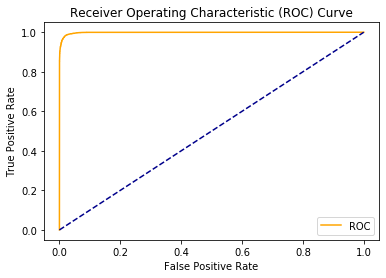

In [22]:
    from sklearn.linear_model import SGDClassifier
    classifier = SGDClassifier(loss='log')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_prob = classifier.predict_proba(X_test)
    


    print (classifier,
           "\nBasic predictor:\n",
           max(y_test.mean(), 1-y_test.mean()),
           "\nAccuracy score:\n", 
           metrics.accuracy_score(y_test, y_pred),
           "\nConfusion matrix:\n", 
           metrics.confusion_matrix(y_test, y_pred),
           "\nClassification report:\n",
           metrics.classification_report(y_test, y_pred))
    
    pos_prob = y_pred_prob[:, 1]

    auc_1 = metrics.roc_auc_score(y_test, pos_prob)
    
    print('ROC_AUC_1:', auc_1 )
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_prob)

    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression





#defining parameter range 
param_grid = {'loss':['log'], 
              'penalty':["l2"],
              'epsilon':[0.1],
              'alpha' :[0.000001 ],#0.0001,
              'max_iter':[5,10,20,30,50,100,500,1000,2000]}

roc_auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_proba= True)
                                   #  needs_threshold=True)



grid = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = False, cv=3, scoring = roc_auc_scorer) #scoring = 'accuracy'‘roc_auc’
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#grid_predictions = grid.predict(X_test) 
  
#print(classification report)
#print(metrics.classification_report(y_test, grid_predictions)) 
#print(metrics.roc_auc_score(y_test, grid_predictions))

/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2 ......


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2, score=0.999, total=  56.9s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.1s remaining:    0.0s
/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2, score=0.998, total=   9.5s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=5, penalty=l2, score=0.998, total=   5.8s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2, score=0.999, total=   8.3s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2, score=0.999, total=   8.3s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=10, penalty=l2, score=0.999, total=   8.3s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2, score=0.999, total=  13.9s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2, score=0.999, total=  13.9s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2 .....


/home/dimas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=20, penalty=l2, score=0.999, total=  13.5s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2 .....
[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2, score=0.999, total=  14.6s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2 .....
[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2, score=0.999, total=  13.5s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2 .....
[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=30, penalty=l2, score=0.999, total=  13.4s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=50, penalty=l2 .....
[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=50, penalty=l2, score=0.999, total=  14.0s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=50, penalty=l2 .....
[CV]  alpha=1e-06, epsilon=0.1, loss=log, max_iter=50, penalty=l2, score=0.999, total=  15.7s
[CV] alpha=1e-06, epsilon=0.1, loss=log, max_iter=50, penalty=l2 .....
[CV]  alph

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.5min finished


{'alpha': 1e-06, 'epsilon': 0.1, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
Basic predictor:
 0.5716029469462488 
Accuracy score:
 0.9836087013383321 
Confusion matrix:
 [[ 9586   241]
 [  135 12977]] 
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      9827
           1       0.98      0.99      0.99     13112

    accuracy                           0.98     22939
   macro avg       0.98      0.98      0.98     22939
weighted avg       0.98      0.98      0.98     22939

ROC_AUC: 0.9989396835231196


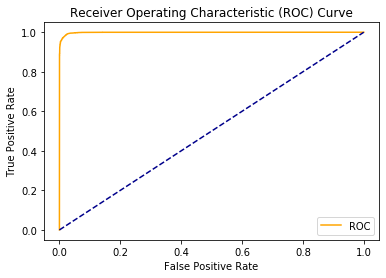

In [23]:
    #classifier = grid.best_estimator_
    classifier = SGDClassifier(alpha=1e-06, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_prob = classifier.predict_proba(X_test)
    


    print (classifier,
           "\nBasic predictor:\n",
           max(y_test.mean(), 1-y_test.mean()),
           "\nAccuracy score:\n", 
           metrics.accuracy_score(y_test, y_pred),
           "\nConfusion matrix:\n", 
           metrics.confusion_matrix(y_test, y_pred),
           "\nClassification report:\n",
           metrics.classification_report(y_test, y_pred))
    
    pos_prob = y_pred_prob[:, 1]

    auc_2 = metrics.roc_auc_score(y_test, pos_prob)
    
    print('ROC_AUC:', auc_2 )
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_prob)

    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [25]:
print(auc_2-auc_1)

0.0003334300233577281
